In [1]:
import igraph
import numpy
import pandas

In [2]:
g_discret_data = pandas.read_csv("processed.cleveland.data",
                                 sep=",")
g_discret_data.head(n=6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
g_discret_data["num"][2]

1

In [4]:
real_network_adj_np = numpy.zeros(shape=[14, 14])
molec_names = list(g_discret_data.columns)[0:14]
real_network_adj_df = pandas.DataFrame(real_network_adj_np, index=molec_names, columns=molec_names)
real_network_adj_df["num"]["age"] = 1
real_network_adj_df["num"]["sex"] = 1
real_network_adj_df["num"]["cp"] = 1
real_network_adj_df["num"]["trestbps"] = 1
real_network_adj_df["num"]["chol"] = 1
real_network_adj_df["num"]["fbs"] = 1
real_network_adj_df["num"]["restecg"] = 1
real_network_adj_df["num"]["thalach"] = 1
real_network_adj_df["num"]["exang"] = 1
real_network_adj_df["num"]["oldpeak"] = 1
real_network_adj_df["num"]["slope"] = 1
real_network_adj_df["num"]["ca"] = 1
real_network_adj_df["num"]["thal"] = 1
real_network_adj = real_network_adj_df.values

IGRAPH D--- 14 13 -- 
+ attr: lable (v)


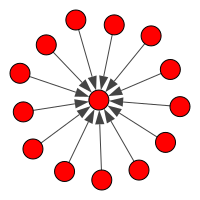

In [5]:
Title = ["age", "sex", "cp", "trestbps", "chol",
         "fbs", "restecg", "thalach", "exang",
         "oldpeak", "slope", "ca", "thal", "num"]
real_network_igraph = igraph.Graph.Adjacency(real_network_adj.tolist())
real_network_igraph.vs["lable"] = Title
print(real_network_igraph.summary())
igraph.drawing.plot(real_network_igraph, bbox=(0, 0, 200, 200))

In [6]:
import csv
import random
import math


def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset1 = list(lines)
    dataset = []
    list1 = [i for i in range(len(dataset1)) for x in dataset1[i] if x == '?']
    for i in range(len(dataset1)):
        if not (i in list1):
            dataset.append(dataset1[i])
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset


def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]


def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated


def mean(numbers):
    return sum(numbers) / float(len(numbers))


def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)


def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries


def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries


def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent


def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities


def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel


def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions


def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0


def main():
    filename = 'processed.cleveland.txt'
    splitRatio = 0.67
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: {0}%'.format(accuracy))

In [7]:
main()

Split 297 rows into train=198 and test=99 rows
Accuracy: 44.44444444444444%
